In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import theano as th
import theano.tensor as tt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
import g3py as g3
import pymc3 as pm

#g3.style_seaborn()
#g3.style_normal()
g3.style_big()
#g3.style_big_seaborn()
g3.style_widget()


th.config.NanGuardMode.big_is_error = False
#th.config.mode = 'DebugMode'
#th.config.mode = 'FAST_RUN'
th.config.exception_verbosity = 'high'

# Data

In [2]:
x, y = g3.load_sunspots()
# x, y = g3.load_co2()

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [3]:
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.15)

Total: 309 | Obs: 46 (14.88673139158576%)


{'GP_Bias_Constant': 41.276085,
 'GP_Noise_Var_log_': array(7.4065165519714355, dtype=float32),
 'GP_SE_ARD_L2_Scales_log_': array([ 1.88369703], dtype=float32),
 'GP_SE_Var_log_': array(7.4065165519714355, dtype=float32)}

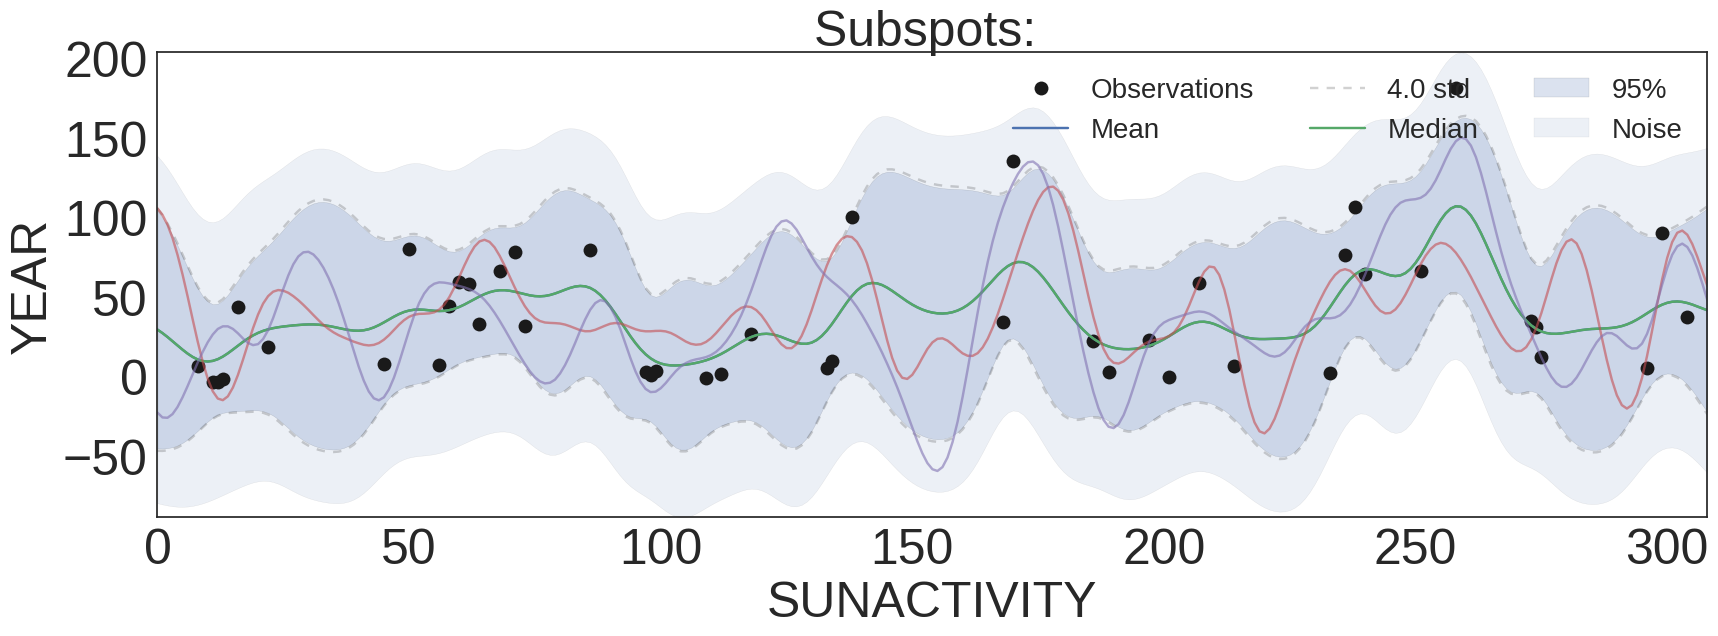

In [5]:
with g3.Model() as model:
    tgp = g3.GP(x, g3.Bias(), g3.SE(x_obs), noise=True)
    tgp.describe('Subspots','SUNACTIVITY','YEAR')
    tgp.observed(x_obs,y_obs)
    #tgp.testing(x_test,y_test)
    tgp.compile()
    
tgp.plot_tgp(tgp.find_default(), samples=2)
tgp.find_default()

In [ ]:
tgp.widget_params(tgp.find_default())

In [ ]:
tgp.plot_tgp(tgp.get_params(), samples=50)

In [ ]:
tgp.plot_tgp(tgp.find_default(), samples=2)

In [ ]:
tgp.plot_gp(tgp.find_default(), samples=2)

In [ ]:
params_break = {'TGP_Bias_Constant': np.array(53.48366928, dtype=np.float32),
 'TGP_Noise_Var_log_': np.array(5.613912582397461, dtype=np.float32),
 'TGP_SE_ARD_L2_Scales_log_': np.array(-5.80507631e+21, dtype=np.float32),
 'TGP_SE_Var_log_': np.array(7.37214088, dtype=np.float32)}
tgp.plot_tgp(params_break, samples=2)
params_break

In [ ]:
tgp.widget_params(tgp.find_default())
tgp.distribution.logp(tgp.get_params())

In [ ]:
points = tgp.find_MAP(tgp.get_params(), 1, plot=True)

In [ ]:
name, logp, params = points[-1]
tgp.plot_tgp(params, samples=2)
params

In [ ]:
traces = tgp.sample_hypers(start=tgp.find_default(), samples=10000, advi=False)

In [ ]:
g3.save_trace(traces)

In [ ]:
g3.style_seaborn()
g3.traceplot(traces)

In [ ]:
datatraces = g3.datatrace(model, traces)
g3.save_datatrace(datatraces)
datatraces.describe().T

In [ ]:
items_ll = ['niter','ll']
items_mt = ['TGP_Bias_Constant','TGP_SE_ARD_L2_Scales_log_']
items_k = ['TGP_Noise_Var_log_','TGP_SE_Var_log_']

g3.plot_datatrace(datatraces,items_mt+items_k)
g3.plot_datatrace(datatraces,items_ll+items_mt)
g3.plot_datatrace(datatraces,items_ll+items_k)

In [ ]:
g3.style_seaborn()

In [ ]:
tgp.widget_trace(traces)

In [ ]:
tgp.plot_tgp(tgp.get_params(), samples=15)

In [ ]:
traces.varnames.clear()
for v in tgp.model.vars:
    traces.varnames.append(v.name)
traces.varnames

In [ ]:
with tgp.model:
    ppc = pm.sample_ppc(traces,100,vars=tgp.model.observed_RVs)

In [ ]:
tgp.plot_tgp(tgp.get_params())

In [ ]:
tgp.plot_gp(tgp.get_params())
_ = g3.plot(ppc['TGP'][:100,:].T, alpha=0.4, zorder=-1)